In [241]:
import numpy as np
import pandas as pd

# Load the data
train = pd.read_csv("input/customer_churn_dataset-training-master.csv")
test = pd.read_csv("input/customer_churn_dataset-testing-master.csv")
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [242]:
# remove id and categorical features
train = train.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
train.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0


In [243]:
test = test.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
test.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,22,25,14,4,27,598,9,1
1,41,28,28,7,13,584,20,0
2,47,27,10,2,29,757,21,0
3,35,9,12,5,17,232,18,0
4,53,58,24,9,2,533,18,0


In [244]:
# check for missing values
train.isnull().sum()

Age                 1
Tenure              1
Usage Frequency     1
Support Calls       1
Payment Delay       1
Total Spend         1
Last Interaction    1
Churn               1
dtype: int64

In [245]:
# remove missing values
train = train.dropna()
train.isnull().sum()

Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64

In [246]:
# check for missing values
test.isnull().sum()

Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64

In [247]:
# shuffle the training data
train = train.sample(frac=1).reset_index(drop=True)
train.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,60.0,21.0,13.0,4.0,14.0,992.00,4.0,1.0
1,40.0,19.0,29.0,4.0,9.0,553.11,19.0,0.0
2,38.0,56.0,20.0,1.0,20.0,427.00,12.0,1.0
3,65.0,53.0,1.0,0.0,2.0,349.00,6.0,1.0
4,59.0,47.0,6.0,7.0,24.0,782.00,23.0,1.0


In [248]:
# Prepare train and test data
X_train = train.drop(['Churn'], axis=1)
y_train = train['Churn']

X_test = test.drop(['Churn'], axis=1)
y_test = test['Churn']

In [249]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 1.65779275, -0.59437352, -0.32697621, ...,  0.12524482,
         1.49659342, -1.21924461],
       [ 0.05038005, -0.7102772 ,  1.53647218, ..., -0.48022477,
        -0.32601883,  0.52571288],
       [-0.11036122,  1.43394085,  0.48828246, ...,  0.85180832,
        -0.84972552, -0.28860061],
       ...,
       [ 0.05038005,  1.60779636, -0.90930383, ..., -1.08569435,
        -2.16615579, -1.10291411],
       [ 0.05038005, -1.7534103 ,  0.83767903, ...,  0.24633873,
        -0.13847942,  1.80534838],
       [ 1.57742211, -0.07280697, -1.7245625 , ..., -1.08569435,
        -1.16118378, -0.52126161]])

In [250]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pc = pca.transform(X_train_scaled)
X_test_pc = pca.transform(X_test_scaled)
X_train_pc

array([[-0.21883795, -0.22686543],
       [ 0.13350508, -1.59737832],
       [ 0.04029994,  0.68059323],
       ...,
       [ 0.40749566,  1.80610809],
       [ 0.20580239, -1.82887661],
       [ 0.99402412,  1.17155559]])

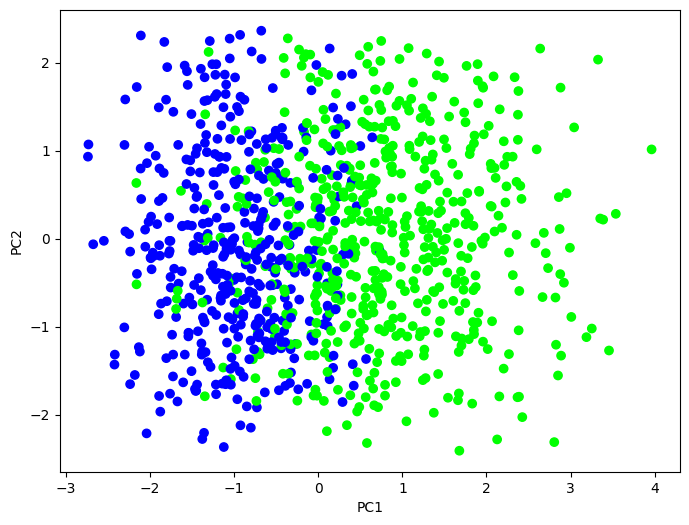

In [251]:
# Plot the data
import matplotlib.pyplot as plt

nr_samples = 1000
fig = plt.figure(figsize=(8, 6))

# 3D if n_components > 2
if pca.n_components > 2:
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train_pc[:nr_samples, 0], X_train_pc[:nr_samples, 1], X_train_pc[:nr_samples, 2],
               c=y_train[:nr_samples],
               cmap='brg')
    ax.set_zlabel('PC3')
else:
    ax = fig.add_subplot(111)
    ax.scatter(X_train_pc[:nr_samples, 0], X_train_pc[:nr_samples, 1], c=y_train[:nr_samples], cmap='brg')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

In [252]:
# Train a logistic regression model with principal components
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_pc, y_train)

# Evaluate the model
print("Train accuracy:", logreg.score(X_train_pc, y_train))
print("Test accuracy:", logreg.score(X_test_pc, y_test))

Train accuracy: 0.8287669679152149
Test accuracy: 0.5885916674433778


In [253]:
# Train a logistic regression model with all features
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Evaluate the model
print("Train accuracy:", logreg.score(X_train_scaled, y_train))
print("Test accuracy:", logreg.score(X_test_scaled, y_test))

Train accuracy: 0.8440970709930313
Test accuracy: 0.5864324106005531


In [254]:
# Do PCA using duckDB
import duckdb

con = duckdb.connect()

# Load the data from CSV
con.execute('create table churn as select * from read_csv_auto(\'input/customer_churn_dataset-training-master.csv\')')

# Return the first 5 rows
con.execute('select * from churn limit 5').fetchdf()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617,20,1


In [255]:
import time

# Compute the variance for Age using duckDB
var = con.execute(
    'with avg_age_table as(select avg(Age) as avg_age from churn) select avg((Age - avg_age) * (Age - avg_age)) as var from churn, avg_age_table').fetchone()
print("Variance:", var)

times = []
for i in range(1000):
    start = time.time()
    con.execute(
        'with avg_age_table as(select avg(Age) as avg_age from churn) select avg((Age - avg_age) * (Age - avg_age)) as var from churn, avg_age_table').fetchone()
    end = time.time()
    times.append(end - start)
print("Average time:", sum(times) / len(times))

Variance: (154.81220736459466,)
Average time: 0.0007101545333862304


In [256]:
# Compute the variance for Age using pandas
var = train['Age'].var()
print("Variance:", var)

times = []
for i in range(1000):
    start = time.time()
    train['Age'].var()
    end = time.time()
    times.append(end - start)
print("Average time:", sum(times) / len(times))

Variance: 154.8125585472486
Average time: 0.0011866157054901123


In [257]:
# Extract the Age column and decompose it using kronecker product decomposition
age_col = train['Age'].to_numpy()

from src.kronecker import svd, compute_shapes, kronecker_decomposition

# Compute the shapes
age_col = np.atleast_2d(age_col).T
shapes = compute_shapes(age_col.shape)

# Perform the decomposition
u, s, v = svd(age_col, shapes[0])

# Compute the kronecker product decomposition
a_s, b_s = kronecker_decomposition(u, s, v, shapes[0], shapes[1])

age_approx = np.kron(a_s[0], b_s[0])

# Compute the error
print("Error:", np.mean(np.abs(age_col - age_approx) / np.mean(age_col)))

Error: 0.26433832642548466


In [258]:
# Save the data to CSV
np.savetxt("input/age_a.csv", a_s[0], delimiter=",")
np.savetxt("input/age_b.csv", b_s[0], delimiter=",")

In [259]:
# Load the data from CSV
con.execute('create table age_a as select * from read_csv_auto(\'input/age_a.csv\')')
con.execute('create table age_b as select * from read_csv_auto(\'input/age_b.csv\')')

# Return the first 5 rows
con.execute('select * from age_a limit 5').fetchdf()

,column0
0,6.386357
1,6.198239
2,6.164338
3,6.203392
4,6.251746


In [272]:
# Compute the variance for Age using duckDB FIXME: this is not correct
var = con.execute(
    'with avg_age_table_krone as(select avg(a.column0) * avg(b.column0) as avg_age from age_a as a positional join age_b as b), sum_a_table as(select sum(column0) as sum_a from age_a), sum_b_table as (select sum(column0) as sum_b from age_b), count_table as (select count() * count() as count_ab from age_a as a positional join age_b as b)'
    # 'select * from avg_age_table_krone, sum_a_table, sum_b_table, count_table').fetchdf()
    'select sum_a * sum_b * sum_a * sum_b / count_ab - avg_age * sum_a * sum_b - avg_age * sum_a * sum_b + avg_age * avg_age * count_ab from avg_age_table_krone, sum_a_table, sum_b_table, count_table').fetchone()
var

(396862.6722564697,)